# HYPOTHESIS TESTING ASSIGNMENT-2
A hospital wants to determine whether there is any difference in the average
Turn Around Time (TAT) of reports of the laboratories on their preferred list. 
They collected a random sample and recorded TAT for reports of 4 laboratories. 
TAT is defined as sample collected to report dispatch.
   
Analyze the data and determine whether there is any difference in average TAT
among the different laboratories at 5% significance level. 
Minitab File: LabTAT.csv


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('LabTAT.csv')
df


,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [2]:
list(df)

['Laboratory 1', 'Laboratory 2', 'Laboratory 3', 'Laboratory 4']

In [3]:
df.shape

(120, 4)

In [4]:
df.corr()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
Laboratory 1,1.000000,-0.126798,0.107501,0.092414
Laboratory 2,-0.126798,1.000000,-0.065967,0.062120
Laboratory 3,0.107501,-0.065967,1.000000,-0.125211
Laboratory 4,0.092414,0.062120,-0.125211,1.000000


In [5]:
df.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


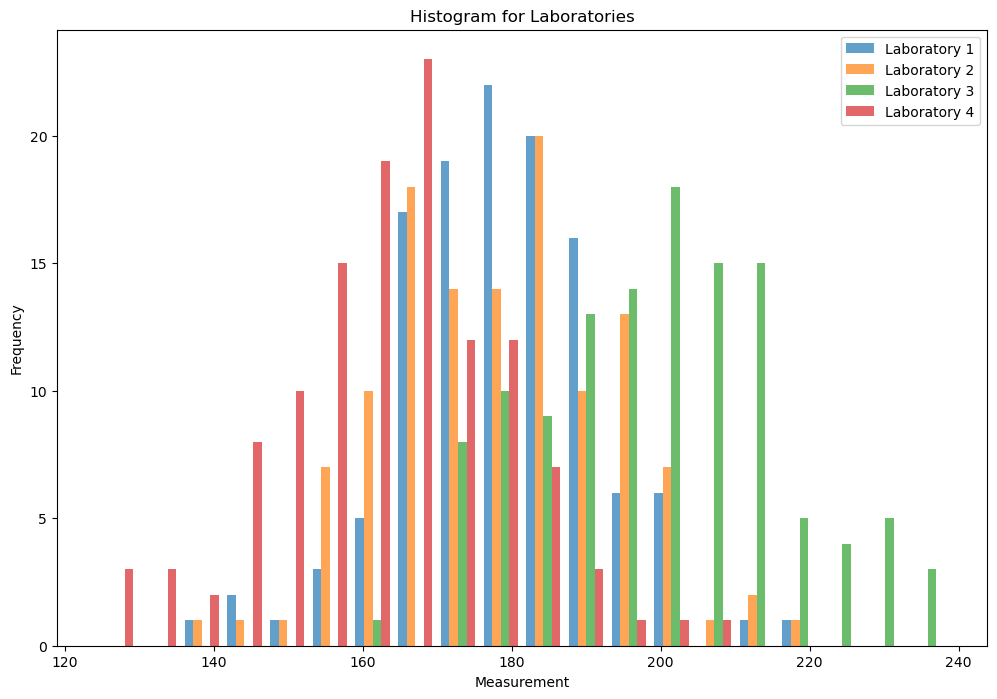

In [7]:
# histogram 
column_names = df.columns
data = [df[column] for column in column_names]
plt.figure(figsize=(12, 8))
plt.hist(data, bins=20, alpha=0.7, label=column_names)
plt.xlabel('Measurement')
plt.ylabel('Frequency')
plt.title('Histogram for Laboratories')
plt.legend()
plt.show()


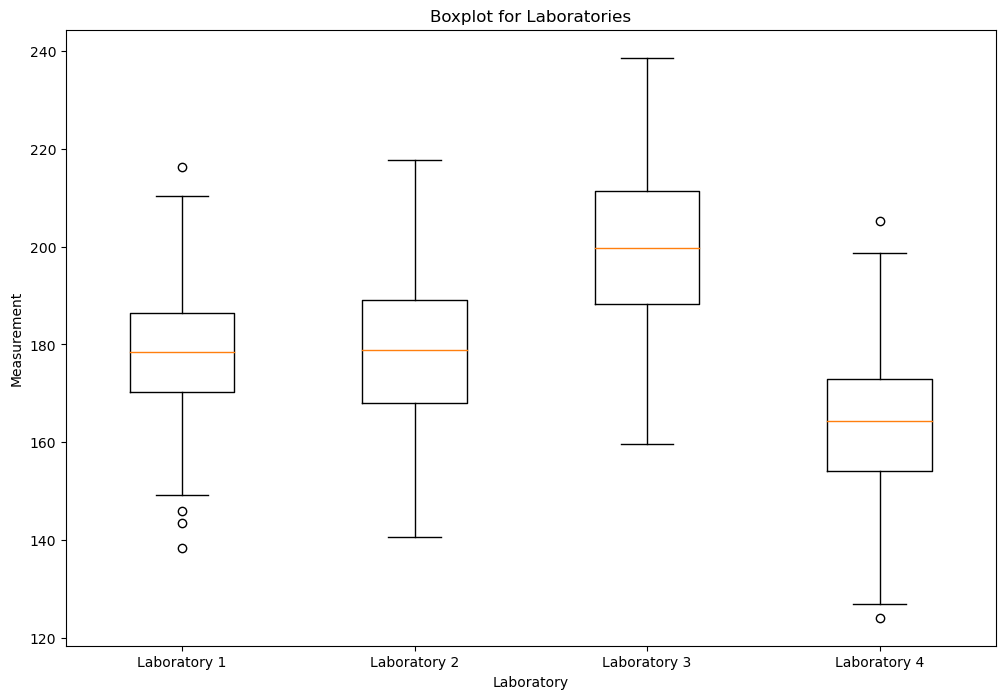

In [8]:
# box plot
column_names = df.columns
data = [df[column] for column in column_names]
plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=column_names)
plt.xlabel('Laboratory')
plt.ylabel('Measurement')
plt.title('Boxplot for Laboratories')
plt.show()


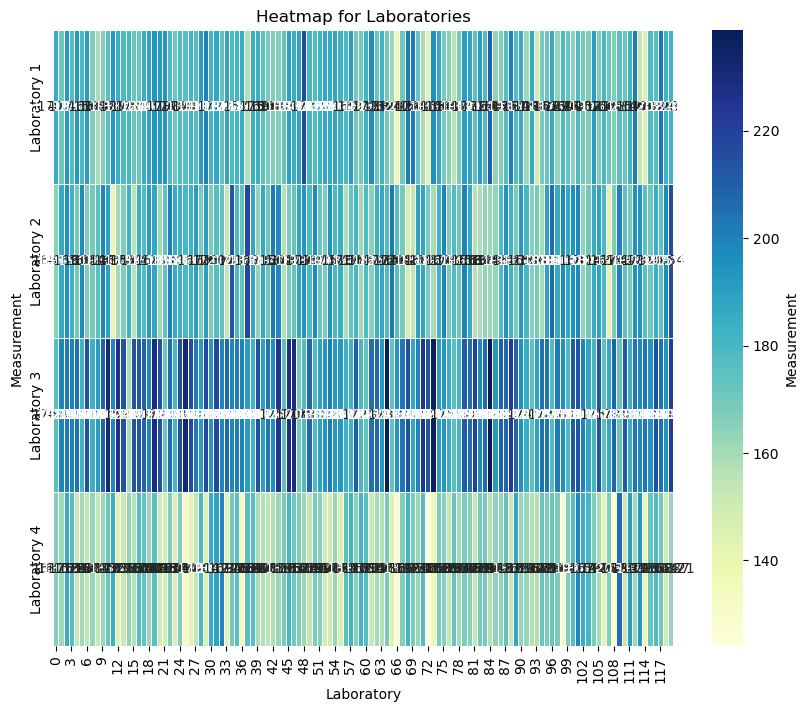

In [9]:
# heat map
column_names = df.columns
data = [df[column] for column in column_names]
plt.figure(figsize=(10, 8))
sns.heatmap(df.T, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5, cbar_kws={"label": "Measurement"})
plt.xlabel('Laboratory')
plt.ylabel('Measurement')
plt.title('Heatmap for Laboratories')
plt.show()


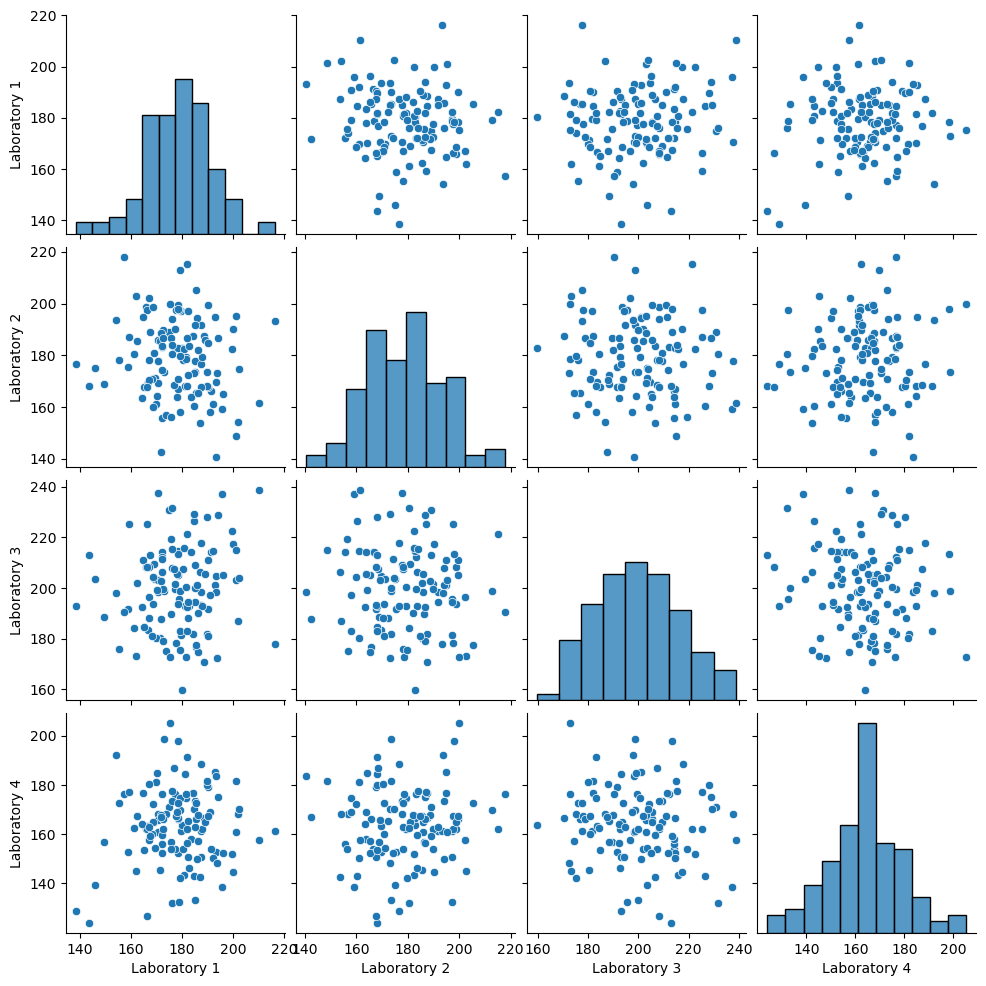

In [10]:
# pair plot
sns.pairplot(df)
plt.show()


In [11]:
from scipy import stats
column_names = df.columns
# Perform t-tests for each pair of laboratories
for i in range(len(column_names)):
    for j in range(i+1, len(column_names)):
        lab1 = df[column_names[i]]
        lab2 = df[column_names[j]]
        # Perform t-test
        t_stat, pval = stats.ttest_ind(lab1, lab2)


In [12]:
if pval < 0.5:
    print("Ho is rejected and H1 is accepted")
if pval >  0.5:
    print("H1 is rejected and Ho is accepted")


Ho is rejected and H1 is accepted


# Inferences
Ho is rejected and H1 is accepted.
Reject the null hypothesis,means there is a significant difference in average TAT
among the different laboratories.
